

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [53]:
# your code here
# use many cells if you like to structure your code well

from IPython.display import IFrame
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'
IFrame(url, 700, 400)


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [54]:
# your code here
# use many cells if you like to structure your code well

import os
import pandas as pd
import numpy as np
import seaborn as sns

file_directory = "C:\\Users\\Admin\\Desktop\\Code\\Workshop_2"
os.listdir(file_directory)

['Assignment2.ipynb',
 'Assignment2_JL.ipynb',
 'Note_2.ipynb',
 'Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv']

In [55]:
file = "C:\\Users\\Admin\\Desktop\\Code\\Workshop_2\\Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv"
db = pd.read_csv(file, header=1)
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15,51,23,NaN,11.0
1,2004.0,February,NaN,7,4,5,2.0
2,2004.0,March,19,2,NaN,2,3.0
3,2004.0,April,5,3,19,NaN,3.0
4,2004.0,May,18,29,56,6,9.0


In [57]:
#extract the headers to list
header_list = db.columns.to_list()
header_list

['Year',
 'Month',
 'Taliban',
 'Civilians',
 'Afghan forces',
 'Nato (detailed in spreadsheet)',
 'Nato - official figures']

In [58]:
#create a new dictionary
db_04_Jan = {}

#assign each value of "index 0, colume key" to new dic
for key in header_list:
    db_04_Jan[key] = db.loc[0, key]

db_04_Jan

{'Year': 2004.0,
 'Month': 'January',
 'Taliban': '15',
 'Civilians': '51',
 'Afghan forces': '23',
 'Nato (detailed in spreadsheet)': nan,
 'Nato - official figures': 11.0}

## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

In [59]:
# your code here
# use many cells if you like to structure your code well

#delete the bottom line index
db = db.drop(index=72)
db.tail()


,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
67,2009.0,August,445,206,190,64,77.0
68,2009.0,September,614,197,133,54,70.0
69,2009.0,October,462,107,86,76,74.0
70,2009.0,November,410,120,69,30,32.0
71,2009.0,December,287,87,65,33,35.0


In [60]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     float64
 1   Month                           72 non-null     object 
 2   Taliban                         71 non-null     object 
 3   Civilians                       72 non-null     object 
 4   Afghan forces                   70 non-null     object 
 5   Nato (detailed in spreadsheet)  66 non-null     object 
 6   Nato - official figures         72 non-null     float64
dtypes: float64(2), object(5)
memory usage: 4.1+ KB


In [61]:
# transform number str to int/float 
columns_to_float = ['Taliban', 'Civilians', 'Afghan forces', 'Nato (detailed in spreadsheet)']
db[columns_to_float] = db[columns_to_float].apply(pd.to_numeric, errors='coerce')

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     float64
 1   Month                           72 non-null     object 
 2   Taliban                         71 non-null     float64
 3   Civilians                       72 non-null     int64  
 4   Afghan forces                   70 non-null     float64
 5   Nato (detailed in spreadsheet)  66 non-null     float64
 6   Nato - official figures         72 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.1+ KB


In [62]:
db.describe()

,Year,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
count,72.00000,71.000000,72.000000,70.000000,66.000000,72.000000
mean,2006.50000,218.408451,55.888889,54.571429,17.378788,19.861111
std,1.71981,209.187515,44.035375,39.370250,17.427445,17.678112
min,2004.00000,5.000000,2.000000,2.000000,1.000000,1.000000
25%,2005.00000,50.000000,24.250000,23.250000,4.250000,6.750000
50%,2006.50000,161.000000,48.500000,49.500000,13.500000,17.000000
75%,2008.00000,315.500000,72.250000,72.250000,23.750000,27.250000
max,2009.00000,945.000000,206.000000,190.000000,90.000000,77.000000


In [63]:
db['Year'] = db['Year'].astype(int).astype(str)
db['Year']

0     2004
1     2004
2     2004
3     2004
4     2004
      ... 
67    2009
68    2009
69    2009
70    2009
71    2009
Name: Year, Length: 72, dtype: object

In [64]:
db['Time'] = db['Year'] +' ' + db['Month']
db['Time']

0       2004 January
1      2004 February
2         2004 March
3         2004 April
4           2004 May
           ...      
67       2009 August
68    2009 September
69      2009 October
70     2009 November
71     2009 December
Name: Time, Length: 72, dtype: object

In [65]:
db_sort = db.drop(columns=['Year', 'Month'])
db_sort.head()

,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Time
0,15.0,51,23.0,NaN,11.0,2004 January
1,NaN,7,4.0,5.0,2.0,2004 February
2,19.0,2,NaN,2.0,3.0,2004 March
3,5.0,3,19.0,NaN,3.0,2004 April
4,18.0,29,56.0,6.0,9.0,2004 May


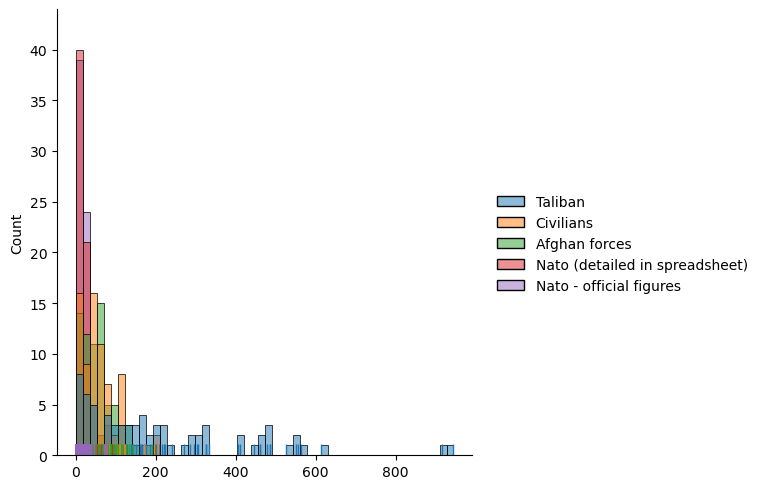

In [70]:
a = sns.displot(db_sort, kde=False, rug=True)

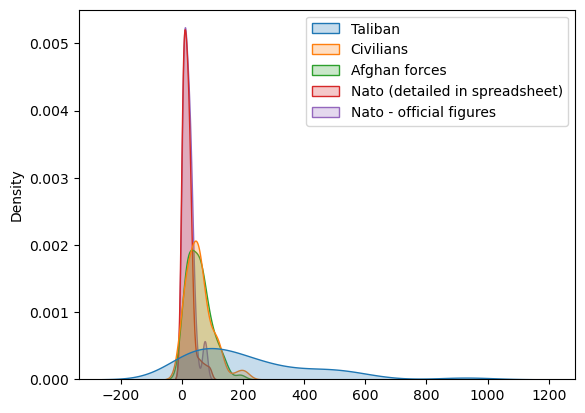

In [71]:
b = sns.kdeplot(db_sort, fill=True)

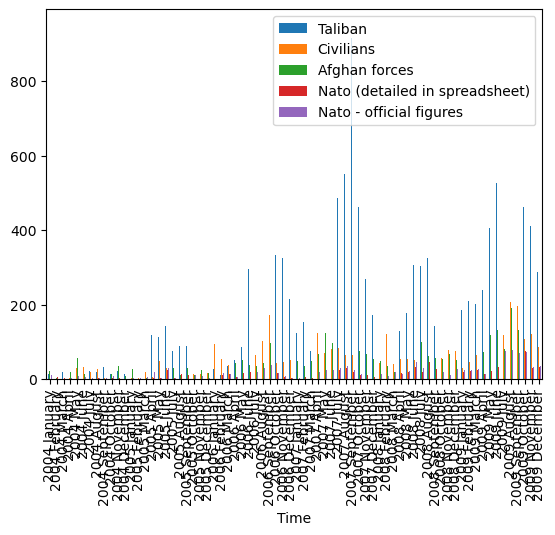

In [74]:
c = db_sort.plot(kind='bar', x='Time')

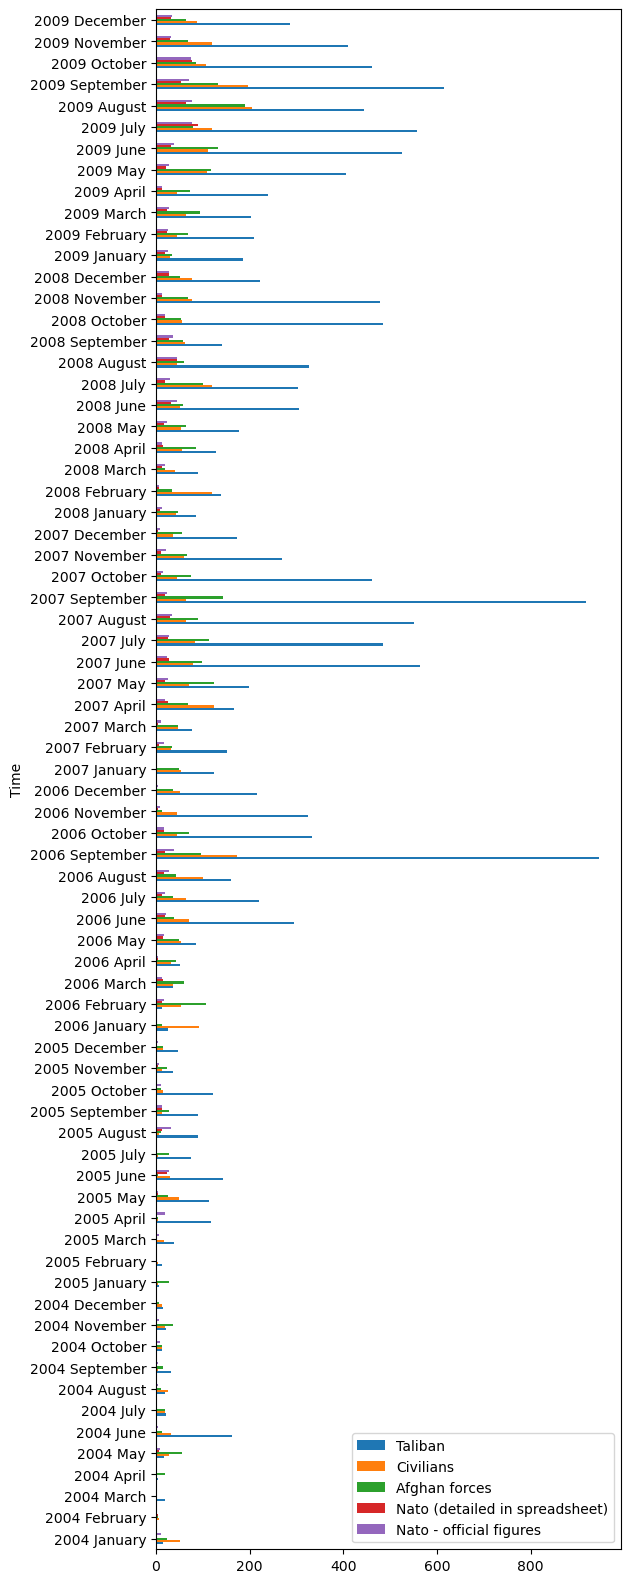

In [76]:
c = db_sort.plot(kind='barh', x='Time', figsize=(6,20))

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [82]:
# your code here
# use many cells if you like to structure your code well

#loop through each row
for index, row in db.iterrows():

    #give a specifical colume's title
    print(row['Taliban'])


15.0
nan
19.0
5.0
18.0
163.0
21.0
20.0
33.0
13.0
21.0
15.0
6.0
14.0
38.0
118.0
113.0
143.0
75.0
90.0
89.0
122.0
36.0
48.0
26.0
12.0
36.0
52.0
85.0
295.0
220.0
161.0
945.0
333.0
325.0
216.0
125.0
152.0
76.0
166.0
199.0
564.0
485.0
551.0
917.0
462.0
270.0
172.0
86.0
139.0
90.0
128.0
177.0
306.0
303.0
326.0
142.0
485.0
479.0
223.0
185.0
209.0
202.0
240.0
406.0
526.0
557.0
445.0
614.0
462.0
410.0
287.0


In [90]:
#create a new list to store the rows
new_db_row = []

for index, row in db.iterrows():
    for num in row:

        # skip the cell whose type is str
        if isinstance(num, (int, float)): 

            # give a threshold
            if num > 500: 

                #add the row to the list
                new_db_row.append(row)
                break

#create a new DataFrame
new_df = pd.DataFrame(new_db_row)

new_df

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Time
32,2006,September,945.0,172,97.0,19.0,38.0,2006 September
41,2007,June,564.0,80,98.0,27.0,24.0,2007 June
43,2007,August,551.0,65,89.0,31.0,34.0,2007 August
44,2007,September,917.0,64,144.0,20.0,24.0,2007 September
65,2009,June,526.0,111,133.0,32.0,38.0,2009 June
66,2009,July,557.0,119,80.0,90.0,76.0,2009 July
68,2009,September,614.0,197,133.0,54.0,70.0,2009 September


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [96]:
Civilians_Afghan_forces = db_sort[['Time','Civilians','Afghan forces']]

#fill NaN with 0
Civilians_Afghan_forces = Civilians_Afghan_forces.fillna(0)

Civilians_Afghan_forces

,Time,Civilians,Afghan forces
0,2004 January,51,23.0
1,2004 February,7,4.0
2,2004 March,2,0.0
3,2004 April,3,19.0
4,2004 May,29,56.0
...,...,...,...
67,2009 August,206,190.0
68,2009 September,197,133.0
69,2009 October,107,86.0
70,2009 November,120,69.0


In [97]:
Civilians_Afghan_forces['Total casulties'] = Civilians_Afghan_forces['Civilians'] + Civilians_Afghan_forces['Afghan forces']
Civilians_Afghan_forces

,Time,Civilians,Afghan forces,Total casulties
0,2004 January,51,23.0,74.0
1,2004 February,7,4.0,11.0
2,2004 March,2,0.0,2.0
3,2004 April,3,19.0,22.0
4,2004 May,29,56.0,85.0
...,...,...,...,...
67,2009 August,206,190.0,396.0
68,2009 September,197,133.0,330.0
69,2009 October,107,86.0,193.0
70,2009 November,120,69.0,189.0


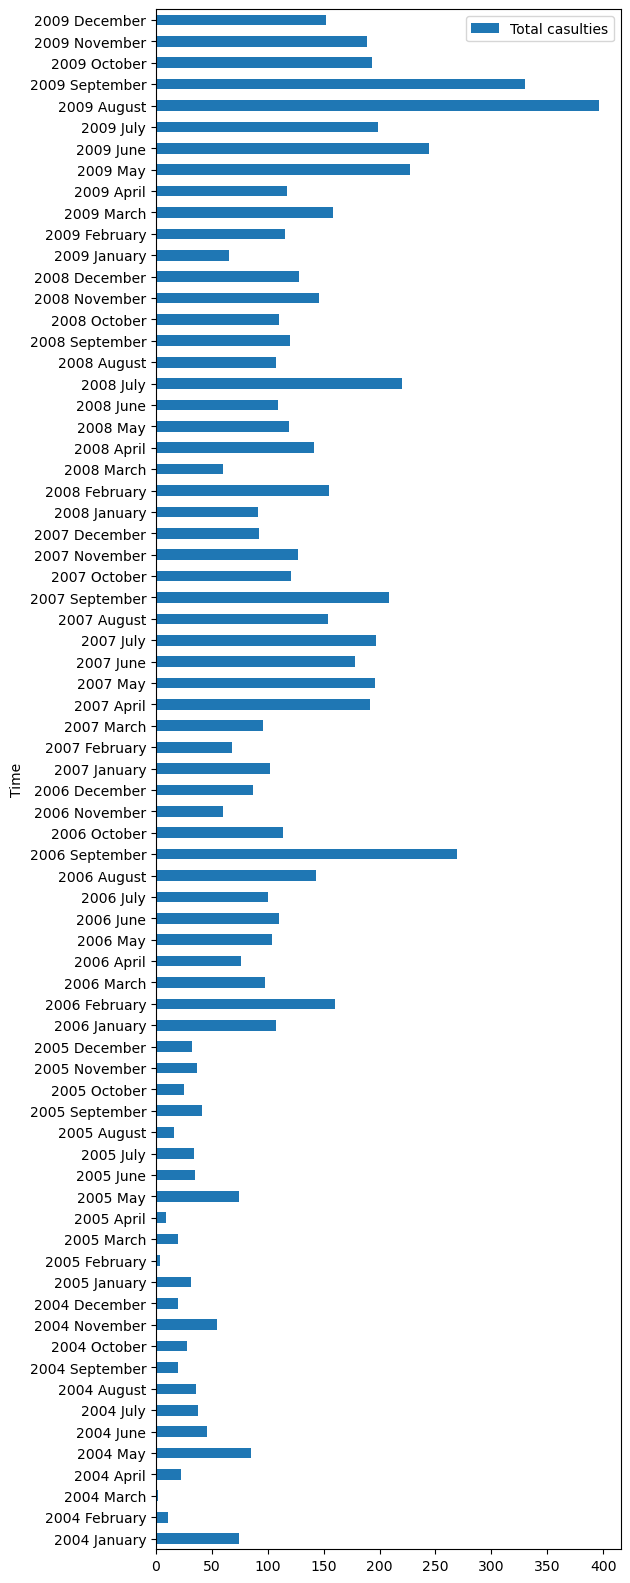

In [100]:
c = Civilians_Afghan_forces.plot(kind='barh', x='Time', y='Total casulties',figsize=(6,20))

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, '2009 March'),
  Text(0.0, 0, '2004 January'),
  Text(10.0, 0, '2004 November'),
  Text(20.0, 0, '2005 September'),
  Text(30.0, 0, '2006 July'),
  Text(40.0, 0, '2007 May'),
  Text(50.0, 0, '2008 March'),
  Text(60.0, 0, '2009 January'),
  Text(70.0, 0, '2009 November'),
  Text(80.0, 0, '')])

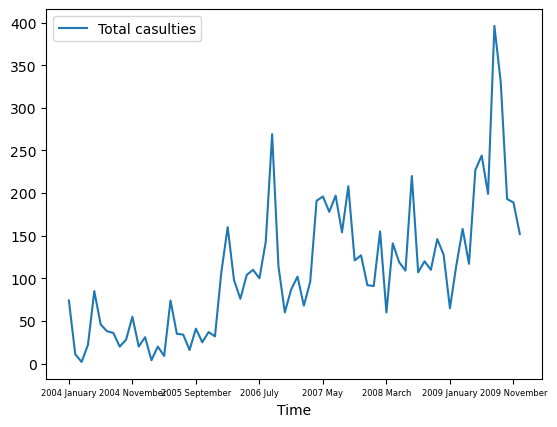

In [113]:
import matplotlib.pyplot as plt

c = Civilians_Afghan_forces.plot(kind='line', x='Time', y='Total casulties')

plt.xticks(fontsize=6)